In [3]:
!pip install opencv-python

import cv2
from google.colab import drive
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


(559, 571)


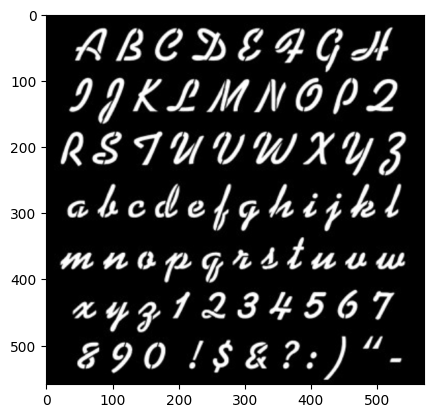

In [5]:
img = cv2.imread('/content/gdrive/My Drive/Colabip/Images/text1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray,cmap='gray')

In [6]:
# 그레이스케일 변환
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # 1 흰색 텍스트와 검정색 배경을 명확히 구분하기위해 적응적 임계값을 적용

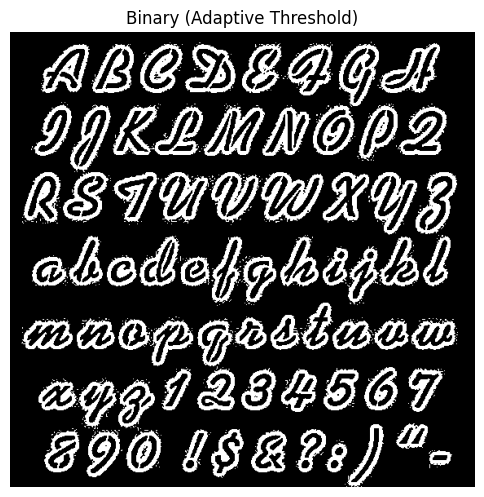

In [14]:
# 1. 적응형 임계값 적용
binary_img = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2
)

# 1. 적응형 임계값 결과
plt.figure(figsize=(6, 6))
plt.imshow(binary_img, cmap="gray")
plt.title("Binary (Adaptive Threshold)")
plt.axis("off")
plt.show()


# # 2 텍스트를 강조하기 위해 마스킹 기법으로 불필요한 배경 제거

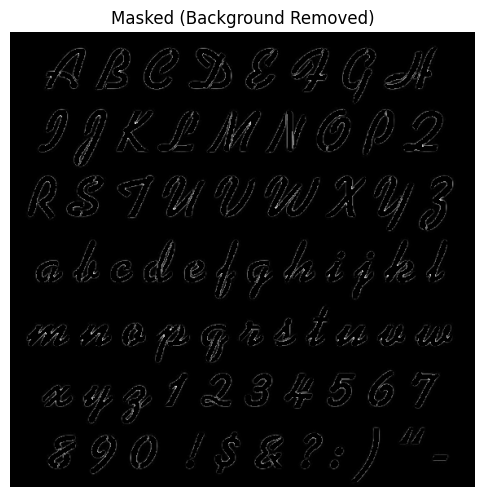

In [15]:
# 2. 마스킹 기법 적용
mask = binary_img.copy()
masked_img = cv2.bitwise_and(gray, gray, mask=mask)

# 2. 마스킹 이미지 결과
plt.figure(figsize=(6, 6))
plt.imshow(masked_img, cmap="gray")
plt.title("Masked (Background Removed)")
plt.axis("off")
plt.show()


# # 3 텍스트 모양은 유지하면서 주변 잡음을 제거

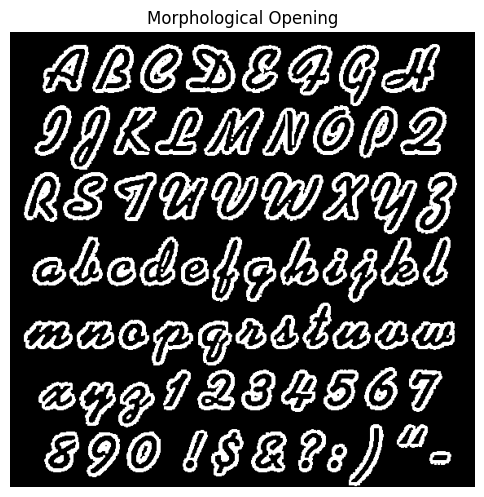

In [16]:
# 3. 모폴로지 연산 (열림)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
opened = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, kernel)  # 작은 잡음 제거

# 3. 모폴로지 연산 결과
plt.figure(figsize=(6, 6))
plt.imshow(opened, cmap="gray")
plt.title("Morphological Opening")
plt.axis("off")
plt.show()


# # 4 모폴로지 그래디언트 연산으로 텍스트 외곽선을 강조하여 글자의 경계를 더 명확히함

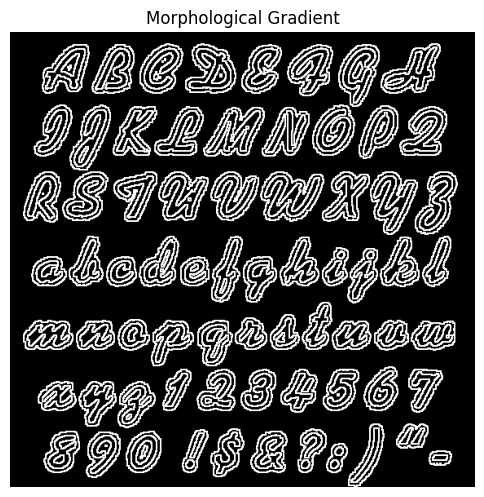

In [17]:
# 4. 모폴로지 그래디언트 (경계선 강조)
gradient = cv2.morphologyEx(opened, cv2.MORPH_GRADIENT, kernel)

# 4. 그래디언트 이미지 결과
plt.figure(figsize=(6, 6))
plt.imshow(gradient, cmap="gray")
plt.title("Morphological Gradient")
plt.axis("off")
plt.show()

# # 5 글자를 개별 객체로 분리하여 각 문자 영역을 독립적으로 감지하기 위해    윤곽선을 추출

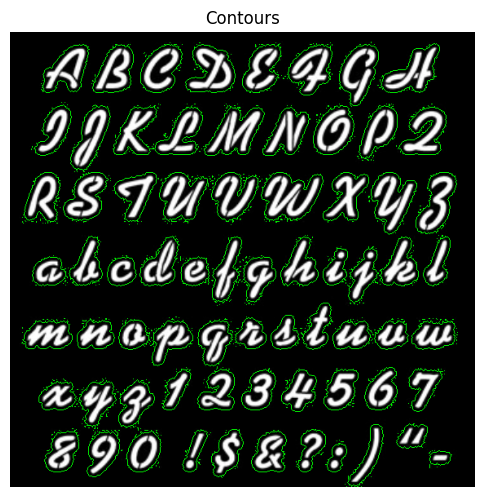

In [18]:
# 5. 윤곽선 추출
contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contour_img = img.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 1)

# 5. 윤곽선 이미지 결과
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title("Contours")
plt.axis("off")
plt.show()